
## 연습문제3: 데이터 시각화 - 인구조사 소득 데이터

제공 데이터 : adult_census_income.csv

조정 소득 지수가 100보다 큰 16세 이상 취업한 성인을 대상으로 한 1994 인구 조사 데이터베이스의 하위 집합 이다.

https://archive.ics.uci.edu/ml/datasets/adult

Kohavi, R., Becker, B.,(1996). UCI Machine Learning

미국 성인 인구조사 소득 예측

Feature | 설명 | 예제 데이터
---- | --- | ----
age | 나이 | 연속데이터
workclass | 고용형태 | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov ...
fnlwgt | 가중치 | 사람 대표성을 나타내는 가중치 (final weight의 약자)
education | 교육 | Bachelors, Some-college, 11th, HS-grad, Prof-school, ...
education-num  | 교육수준 수치 |  연속데이터
marital-status  | 결혼상태 |  Married-civ-spouse, Divorced, Never-married, ...
occupation  | 업종 |  Tech-support, Craft-repair, Other-service, Sales, ...
relationship | 가족관계 |  Wife, Own-child, Husband, Not-in-family, ...
race | 인종 | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex | 성별 | Female, Male.
capital-gain | 양도소득 | continuous.
capital-loss | 양도손실 | continuous.
hours-per-week | 주당근무시간 | continuous.
native-country | 국적 | United-States, Cambodia, England, Puerto-Rico, Canada, ...
income |  수익 (Target) | >50K, <=50K



데이터를 다음과 같은 수순으로 데이터 시각화를 수행하시오

1. 결측치가 '?'로 되어 있다. 특정 문자 NaN으로 대체 하시오
1. missingno 를 사용하여 결측치의 분포를 시각화 하시오
1. 컬럼별 결측치를 카운트 하시오
1. 데이터 전체의 결측치 개수를 카운트 하시오
1. workclass 컬럼 시각화
  * workclass 컬럼을 시각화 하시오. x축(workclass)은 고용의 형태, y축은 개수(count). (힌트: sns.countplot()을 사용하면 편리)
  * 개수가 많은 순서대로 workclass 컬럼을 시각화 하시오. (힌트: sns.countplot 함수와 이 함수의 order 를 사용)
  * workclass 컬럼 성별로 다른 색으로 개수(count)를 표시하시오 (힌트: sns.countplot 함수와 이 함수의 hue를 활용)
1. age 컬럼 시각화
  * age 분포를 히스토그램으로 시각화 하시오. (힌트: sns.histplot()를 사용하면 손쉽게 그릴 수 있음)
  * age 히스토그램과 함께 커널밀도추정(KDE)를 추가 표현하시오 (힌트: sns.histplot()의 kde 옵션을 사용)
  * age 히스토그램에 수입(income)을 함께 표현 하시오. (힌트: sns.histplot()의 hue 옵션을 사용)



In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style="whitegrid")


In [1]:
from google.colab import files
upload = files.upload()

Saving adult_census_income.csv to adult_census_income.csv


In [4]:
df = pd.read_csv('adult_census_income.csv')
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df = df.replace('?', np.nan)
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

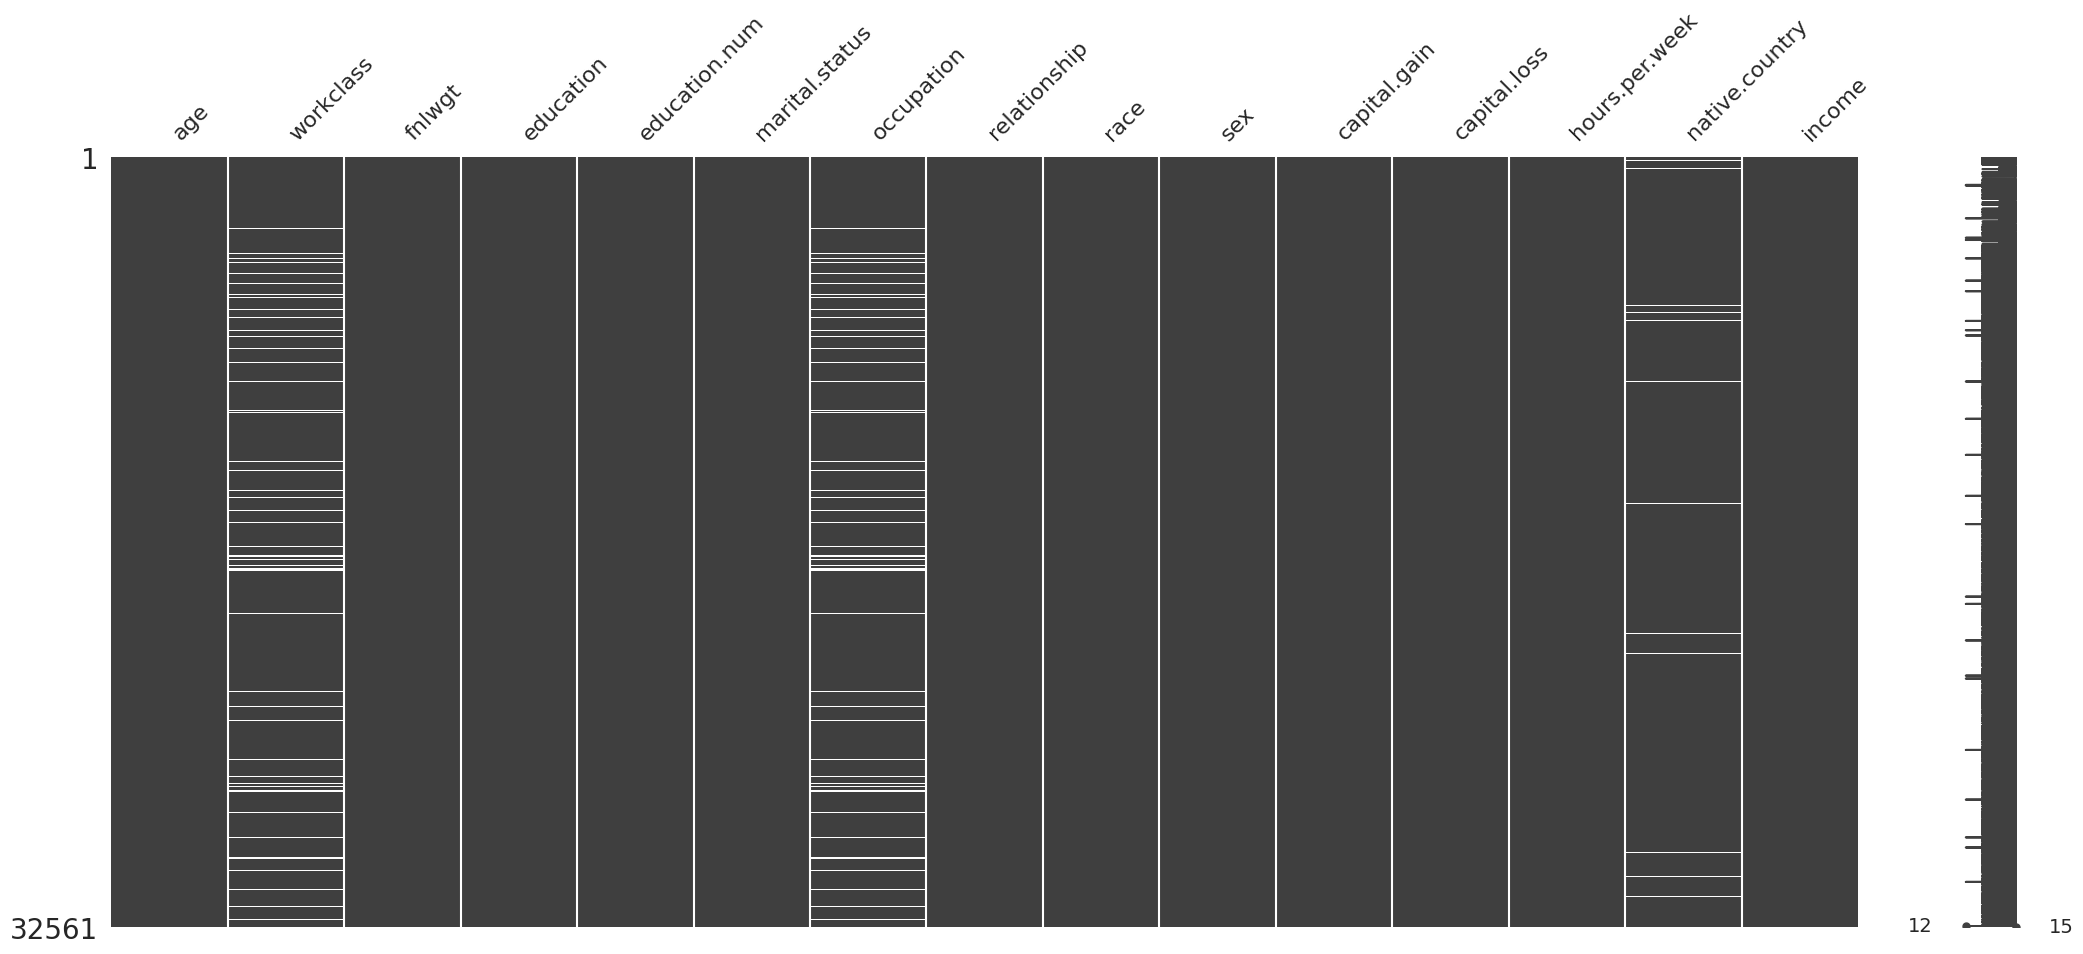

In [6]:
msno.matrix(df)
plt.show()

In [7]:
msno.heatmap(df)
plt.show()


In [8]:
# 컬럼별 결측치 개수
nulls_by_col = df.isna().sum().sort_values(ascending=False)
nulls_by_col

occupation        1843
workclass         1836
native.country     583
fnlwgt               0
education            0
education.num        0
age                  0
marital.status       0
relationship         0
sex                  0
race                 0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [9]:
# 전체 결측치 개수
total_nulls = df.isna().sum().sum()
print("\nTotal missing values:", total_nulls)


Total missing values: 4262


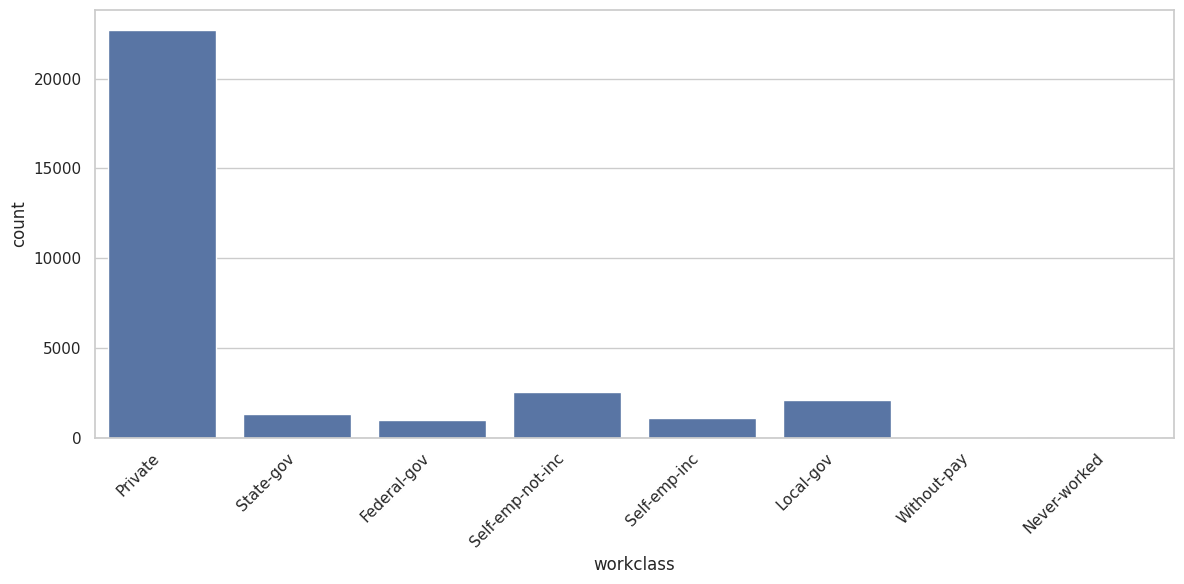

In [10]:
# workclass 기본 분포 시각화
ax = sns.countplot(data=df, x='workclass')
ax.set_xlabel('workclass')
ax.set_ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


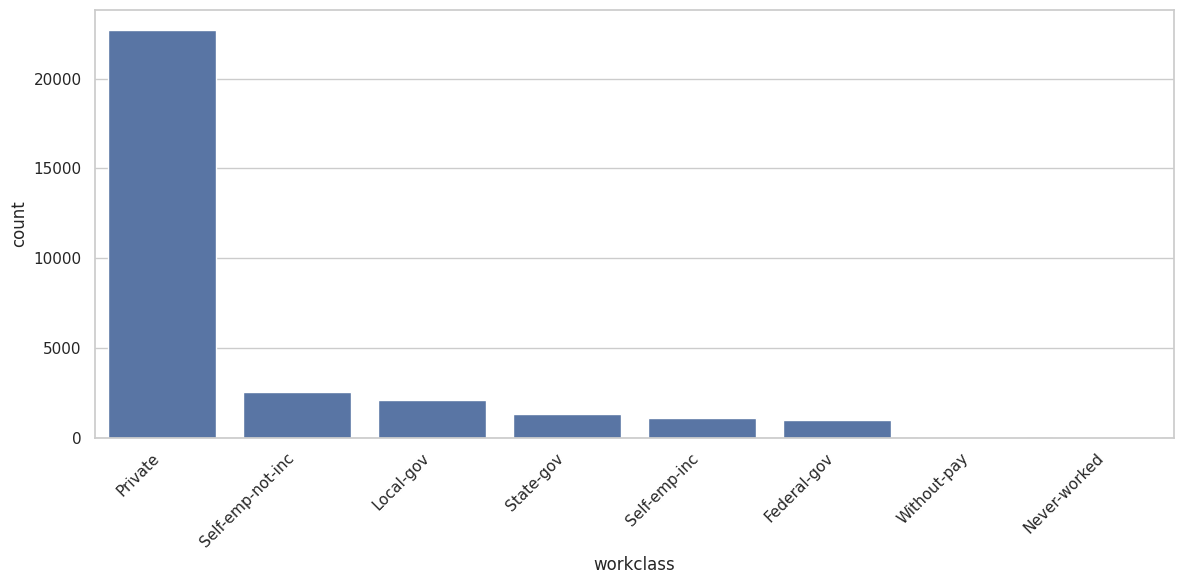

In [11]:
# workclass 개수 많은 순서대로 시각화
order = df['workclass'].value_counts().index
ax = sns.countplot(data=df, x='workclass', order=order)
ax.set_xlabel('workclass')
ax.set_ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
# workclass 분포 (성별 hue)
order = df['workclass'].value_counts().index
ax = sns.countplot(data=df, x='workclass', hue='sex', order=order)
ax.set_xlabel('workclass')
ax.set_ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

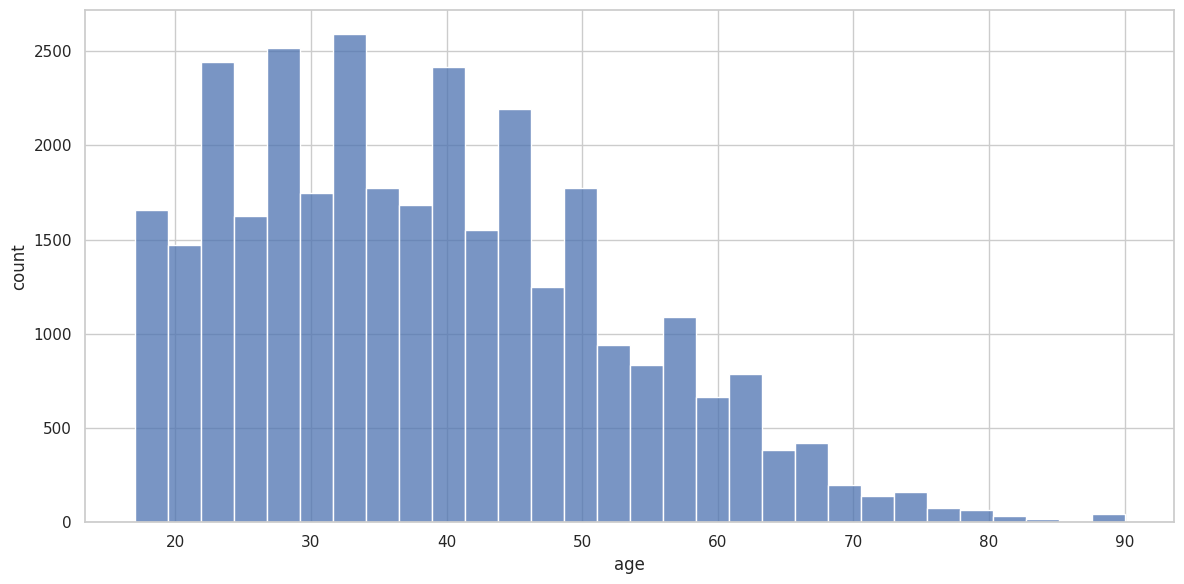

In [13]:
# age 히스토그램 (기본)
sns.histplot(data=df, x='age', bins=30)
plt.xlabel('age')
plt.ylabel('count')
plt.tight_layout()
plt.show()


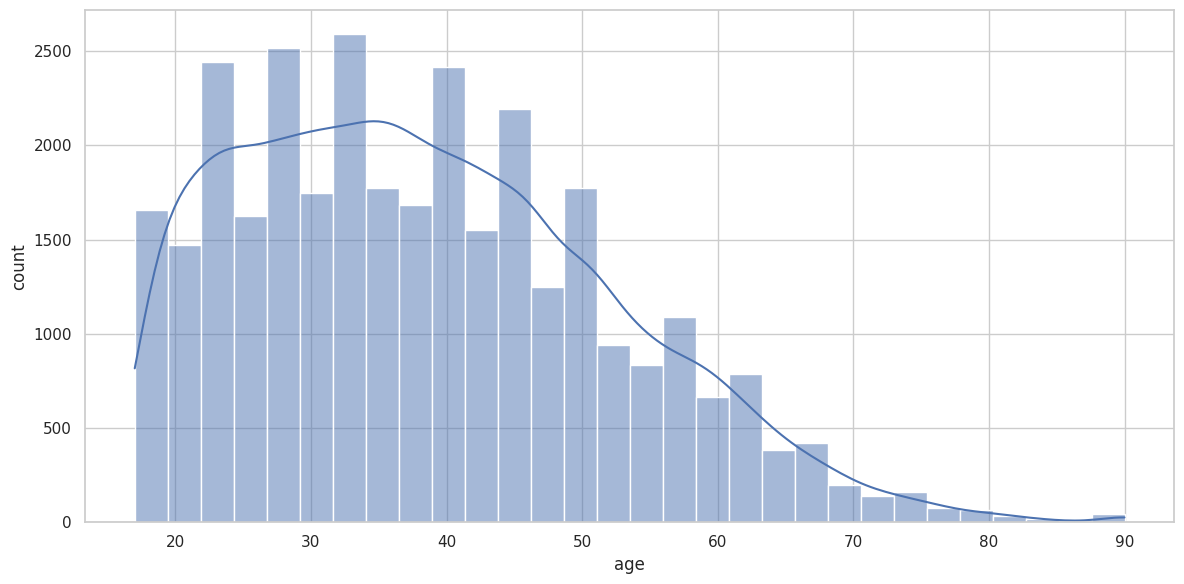

In [14]:
# age 히스토그램 + KDE
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.xlabel('age')
plt.ylabel('count')
plt.tight_layout()
plt.show()

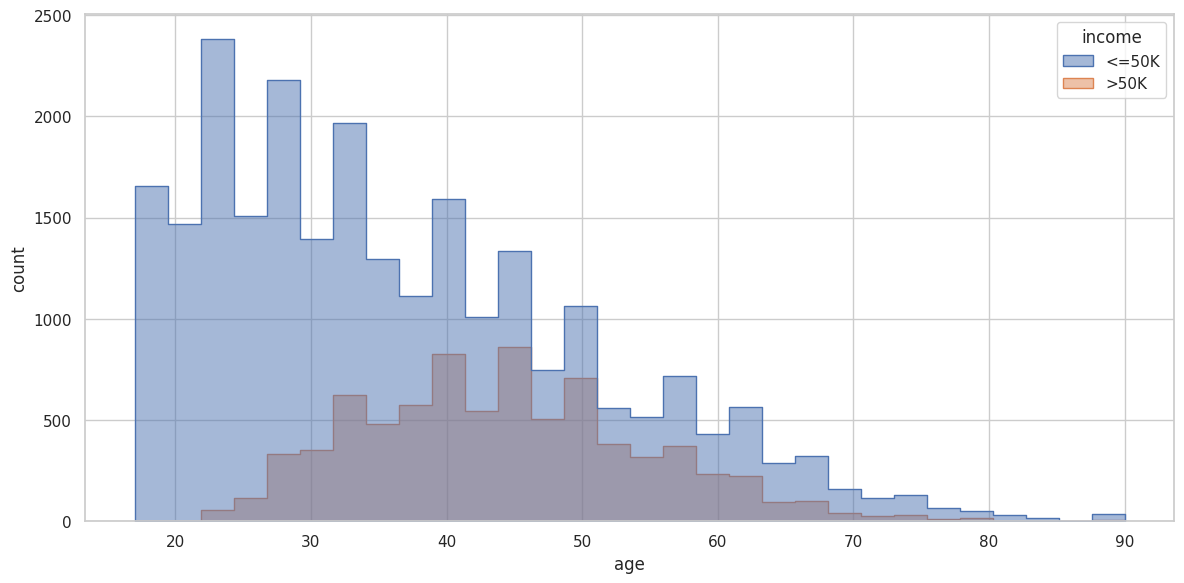

In [15]:
# age 히스토그램 (income 별)
sns.histplot(data=df, x='age', bins=30, hue='income', element='step', stat='count', common_norm=False, alpha=0.5)
plt.xlabel('age')
plt.ylabel('count')
plt.tight_layout()
plt.show()


In [18]:
data = [65,4,7,8,2,3,3,12,555,768,99,2,3,6,6,4,65,4,7,8,2,3,3,12,555,768,99,2,3,6,6,4]

In [19]:
cntdict = {}

for num in data:
  if num in cntdict:
    cntdict[num]+=1
  else:
    cntdict[num] = 1
cntdict

{65: 2, 4: 4, 7: 2, 8: 2, 2: 4, 3: 6, 12: 2, 555: 2, 768: 2, 99: 2, 6: 4}